In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [6]:
df = pd.read_csv('final_cleaned_gurgaon_property.csv').drop('Unnamed: 0',axis=1)

In [7]:
df.head()

property_type                 society      sector  price_in_crores  \
0          flat  maa bhagwati residency    sector 7             0.45   
1          flat            apna enclave    sector 3             0.50   
2          flat  tulsiani easy in homes  sohna road             0.40   
3          flat     smart world orchard   sector 61             1.47   
4          flat        parkwood westend   sector 92             0.70   

   price_per_sqft  area_sqft                            areaWithType  bedRoom  \
0          5000.0      900.0          Carpet area: 900 (83.61 sq.m.)      2.0   
1          7692.0      650.0          Carpet area: 650 (60.39 sq.m.)      2.0   
2          6722.0      595.0          Carpet area: 595 (55.28 sq.m.)      2.0   
3         12250.0     1200.0        Carpet area: 1200 (111.48 sq.m.)      2.0   
4          5204.0     1345.0  Super Built up area 1345(124.95 sq.m.)      2.0   

   bathroom balcony  floorNum         facing       agePossession  \
0       2.0       1       4.0           West      Relatively New   
1       2.0       1       1.0           West        Old Property   
2       2.0       3      12.0  not available        New Property   
3       2.0       2       2.0  not available           Undefined   
4       2.0       3       5.0  not available  Under Construction   

   Super Built up area  Built Up area  Carpet area  study room  store room  \
0                  NaN            NaN        900.0           0           0   
1                  NaN            NaN        650.0           0           0   
2                  NaN            NaN        595.0           0           0   
3                  NaN            NaN       1200.0           0           0   
4               1345.0            NaN          NaN           0           0   

   Pooja Room  servant room  Others  furnishing_type  luxury_score  
0           0             0       0                1            28  
1           0             0       0                0            37  
2           0             0       0                1            36  
3           0             0       0                1            76  
4           0             0       0                1             0

## property_type vs price

<Axes: xlabel='property_type', ylabel='price_in_crores'>

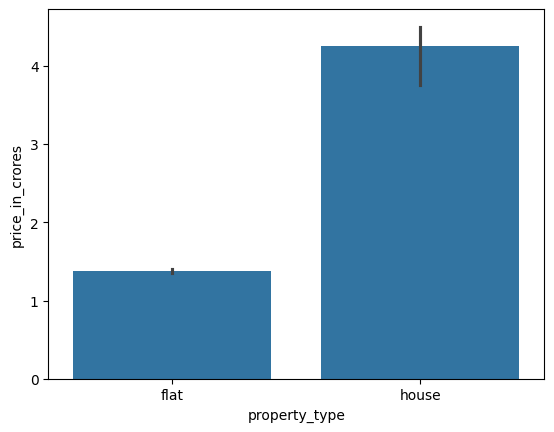

In [9]:
sns.barplot(x=df['property_type'], y=df['price_in_crores'], estimator=np.median)

<Axes: xlabel='property_type', ylabel='price_in_crores'>

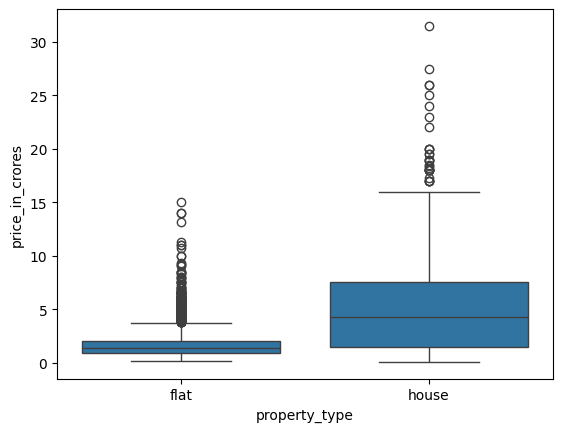

In [10]:
sns.boxplot(x=df['property_type'], y=df['price_in_crores'])

## property_type vs area

<Axes: xlabel='property_type', ylabel='Built Up area'>

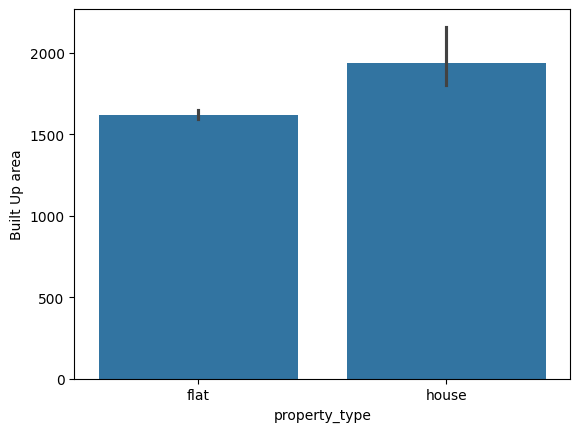

In [14]:
sns.barplot(x=df['property_type'], y=df['Built Up area'], estimator=np.median)

<Axes: xlabel='property_type', ylabel='Built Up area'>

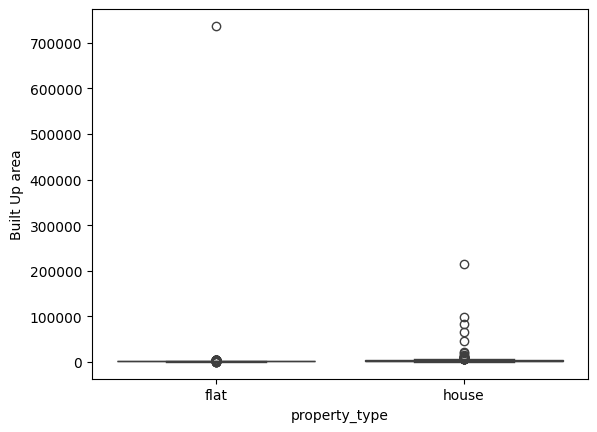

In [15]:
sns.boxplot(x=df['property_type'], y=df['Built Up area'])

In [16]:
df = df[df['Built Up area'] != 737147 ]

In [ ]:
df['Built Up area']

<Axes: xlabel='property_type', ylabel='Built Up area'>

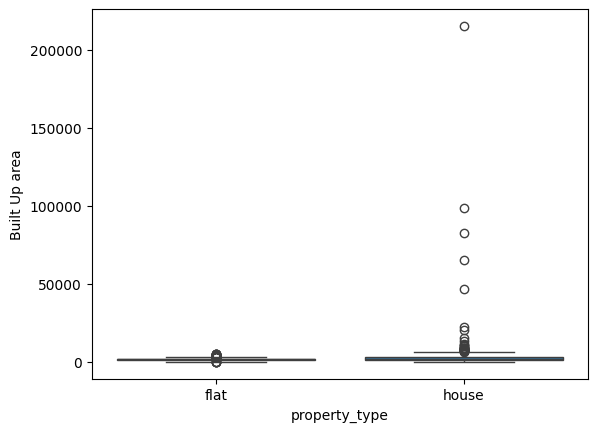

In [17]:
sns.boxplot(x=df['property_type'], y=df['Built Up area'])

In [19]:
df = df[~((df['property_type'] == 'house') & ((df['Built Up area'] > 50000) | (df['Built Up area'].isna())))]

<Axes: xlabel='property_type', ylabel='Built Up area'>

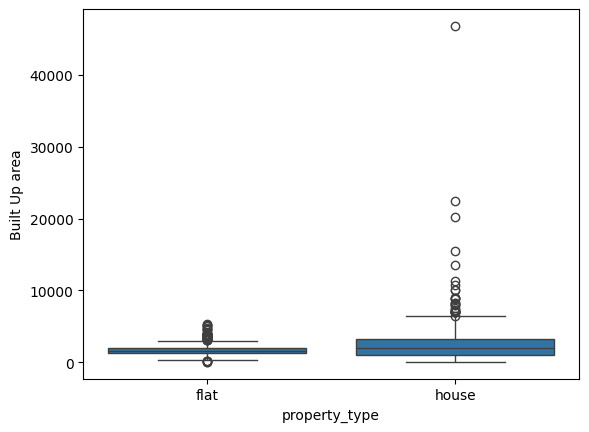

In [20]:
sns.boxplot(x=df['property_type'], y=df['Built Up area'])

## property_type vs price_per_sqft

<Axes: xlabel='property_type', ylabel='price_per_sqft'>

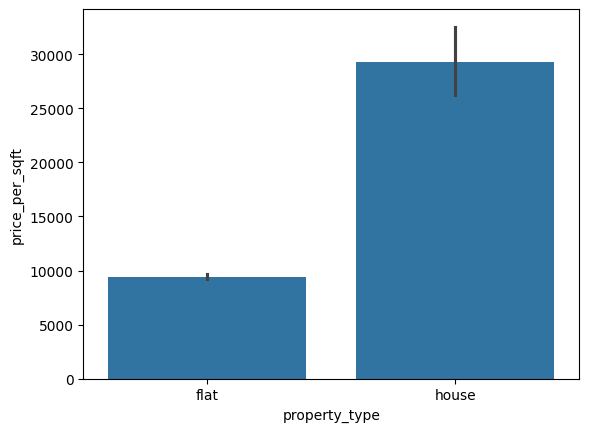

In [21]:
sns.barplot(x=df['property_type'], y=df['price_per_sqft'])

<Axes: xlabel='property_type', ylabel='price_per_sqft'>

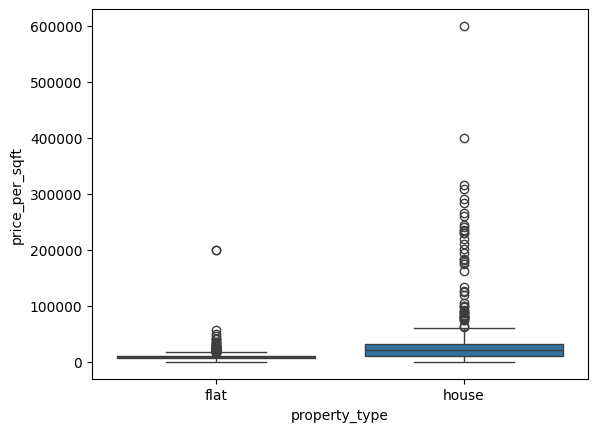

In [22]:
sns.boxplot(x=df['property_type'], y=df['price_per_sqft'])

In [43]:
df[df['price_per_sqft'] > 10000][['property_type','sector','society','price_in_crores','price_per_sqft','area_sqft','areaWithType','Super Built up area','Built Up area','Carpet area']].head()

property_type             sector              society  price_in_crores  \
3           flat          sector 61  smart world orchard             1.47   
6           flat  dwarka expressway           the cocoon             2.00   
9           flat          sector 78       raheja revanta             4.75   
15          flat         sector 108           sobha city             3.95   
16          flat          sector 62         senate court             0.90   

    price_per_sqft  area_sqft  \
3          12250.0     1200.0   
6          13333.0     1500.0   
9          16885.0     2813.0   
15         16859.0     2343.0   
16         14084.0      639.0   

                                         areaWithType  Super Built up area  \
3                    Carpet area: 1200 (111.48 sq.m.)                  NaN   
6              Super Built up area 1500(139.35 sq.m.)               1500.0   
9                  Built Up area: 2813 (261.34 sq.m.)                  NaN   
15  Built Up area: 2343 (217.67 sq.m.)Carpet area:...                  NaN   
16                   Built Up area: 639 (59.37 sq.m.)                  NaN   

    Built Up area  Carpet area  
3             NaN       1200.0  
6             NaN          NaN  
9          2813.0          NaN  
15         2343.0       2300.0  
16          639.0          NaN

<Axes: xlabel='bedRoom', ylabel='property_type'>

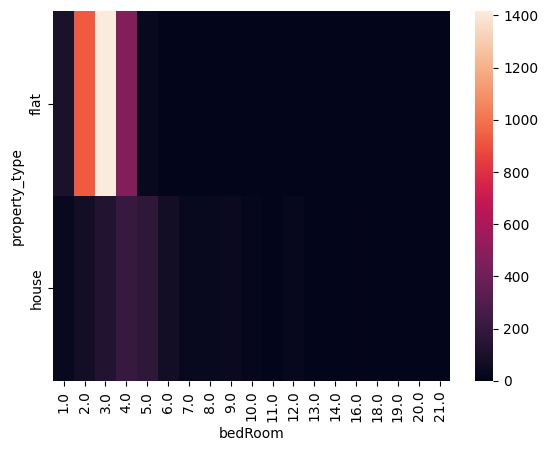

In [25]:
sns.heatmap(pd.crosstab(df['property_type'],df['bedRoom']))

In [26]:
## checking outliers

In [27]:
df[df['bedRoom']>=10]

property_type                      society          sector  \
2944         house                  independent       sector 43   
2945         house                  independent       sector 54   
2946         house                  independent       sector 43   
2947         house                  independent       sector 43   
2949         house       Luxury DLF City Floors       sector 26   
2954         house       DLF City Plots Phase 3       sector 24   
2973         house                  independent       sector 25   
2976         house    FLOOR WISE DESIGNER KOTHI       sector 25   
2980         house                  independent       sector 55   
2981         house                  independent       sector 43   
2982         house                  independent       sector 56   
2983         house                  independent       sector 56   
3002         house                  independent       sector 40   
3016         house                  independent       sector 56   
3050         house                private house       sector 55   
3051         house                  independent       sector 11   
3070         house                  independent       sector 17   
3090         house                     shivpuri        sector 7   
3106         house                  independent       sector 43   
3113         house                  independent       sector 38   
3131         house                  independent        sector 9   
3147         house                 Malibu Towne       sector 47   
3160         house                  independent       sector 56   
3163         house                  independent       sector 11   
3200         house                  independent      sector 104   
3219         house                  independent       sector 24   
3247         house       Laxmi Garden Sector-11       sector 11   
3260         house                  independent       sector 43   
3269         house          HUDA Plot Sector 38       sector 38   
3280         house                  independent       sector 43   
3324         house                  independent       sector 39   
3339         house                  independent       sector 43   
3354         house                     shivpuri        sector 7   
3370         house                  independent       sector 11   
3402         house                  independent       sector 17   
3424         house                  independent      sohna road   
3433         house                  independent       sector 26   
3434         house               DLF City Plots       sector 26   
3445         house               Uppal Southend       sector 49   
3448         house                  independent       sector 46   
3476         house                  independent       sector 26   
3481         house       DLF City Plots Phase 2       sector 25   
3487         house                  independent       sector 43   
3497         house                  independent       sector 46   
3514         house                  independent       sector 31   
3530         house       Luxury DLF City Floors       sector 26   
3557         house                  independent  mehrauli  road   
3582         house                  independent       sector 26   
3584         house                  independent       sector 57   
3595         house                  independent       sector 43   
3619         house  Independent House Sector 45       sector 40   
3626         house                  independent       sector 26   
3630         house                  independent       sector 55   
3632         house   Unitech Palms South City 1       sector 41   
3650         house                  independent       sector 54   
3668         house                  independent       sector 40   
3679         house                  independent       sector 25   
3680         house                  independent       sector 27   
3684         house                  independent     

In [28]:
## property vs floorNum

<Axes: xlabel='property_type', ylabel='floorNum'>

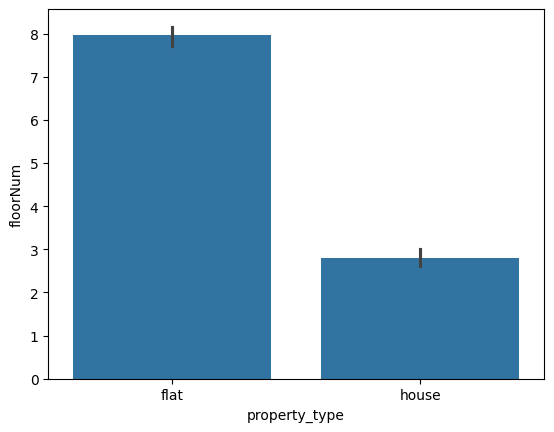

In [29]:
sns.barplot(x=df['property_type'], y=df['floorNum'])

<Axes: xlabel='property_type', ylabel='floorNum'>

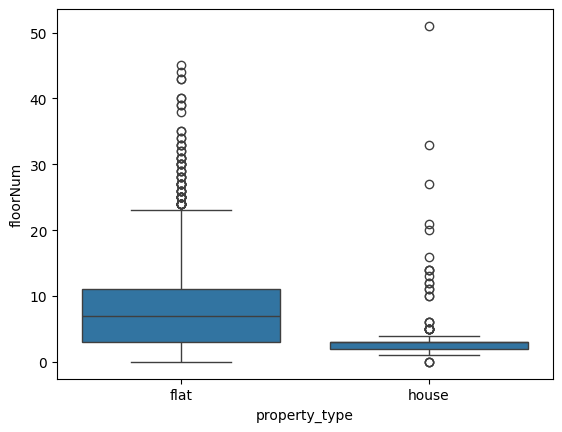

In [30]:
sns.boxplot(x=df['property_type'], y=df['floorNum'])

In [31]:
# checking outliers

In [32]:
df[(df['property_type']=='house') & (df['floorNum']>10)]

property_type                  society      sector  price_in_crores  \
3092         house               Ninex City   sector 76             1.75   
3093         house              Spaze Privy   sector 72             3.10   
3119         house           ATS Tourmaline  sector 109             1.87   
3138         house           DLF The Arbour   sector 63             8.50   
3167         house              independent   sector 92             1.80   
3277         house  Indiabulls Centrum Park  sector 103             3.25   
3334         house              Greenopolis   sector 89             0.70   
3340         house              Spaze Privy   sector 72             3.09   
3341         house      Satya The Hermitage  sector 103             3.15   
3374         house        Suncity Avenue 76   sector 76             0.75   
3387         house         Suncity Township   sector 54             2.00   
3499         house      Ireo Victory Valley   sector 67             8.00   
3604         house   Vatika The Seven Lamps   sector 82             1.60   
3748         house          Godrej Meridien  sector 106             5.60   

      price_per_sqft    area_sqft areaWithType  bedRoom  bathroom balcony  \
3092          6250.0  2800.000000          NaN      4.0       4.0       0   
3093          8486.0  3653.075654          NaN      5.0       5.0      3+   
3119          8697.0  2150.166724          NaN      3.0       4.0       0   
3138         21519.0  3949.997676          NaN      4.0       4.0      3+   
3167          7627.0  2360.036712          NaN      4.0       5.0       0   
3277          8125.0  4000.000000          NaN      4.0       3.0      3+   
3334          5397.0  1297.016861          NaN      2.0       2.0       2   
3340          6981.0  4426.299957          NaN      5.0       5.0      3+   
3341          6702.0  4700.089526          NaN      4.0       5.0       0   
3374         10067.0   745.008443          NaN      2.0       2.0       2   
3387         30968.0   645.827951          NaN      9.0       9.0       3   
3499         22222.0  3600.036000          NaN      6.0       7.0      3+   
3604          6597.0  2425.344854          NaN      4.0       4.0      3+   
3748         14000.0  4000.000000          NaN      5.0       4.0      3+   

      floorNum      facing   agePossession  Super Built up area  \
3092      14.0         NaN       Undefined                  NaN   
3093      21.0         NaN  Relatively New                  NaN   
3119      12.0         NaN       Undefined                  NaN   
3138      27.0         NaN       Undefined                  NaN   
3167      13.0         NaN       Undefined                  NaN   
3277      20.0         NaN       Undefined                  NaN   
3334      14.0  North-East       Undefined                  NaN   
3340      14.0        East  Relatively New                  NaN   
3341      12.0        East       Undefined                  NaN   
3374      11.0  North-East    New Property                  NaN   
3387      11.0       North  Relatively New                  NaN   
3499      51.0  North-East  Moderately Old                  NaN   
3604      16.0       North  Moderately Old                  NaN   
3748      33.0  North-East    New Property                  NaN   

      Built Up area  Carpet area  study room  store room  Pooja Room  \
3092        2800.00          NaN           0           0           0   
3093        3653.08          NaN           0           0           0   
3119        2150.17          NaN           0           0           0   
3138        3950.00          NaN           0           0           0   
3167        2360.04          NaN           0           0           0   
3277        4000.00          NaN           0           0           0   
3334        1297.02          NaN           0           0           0   
3340        4426.30          NaN           0           0           0   
3341        4700.09          NaN           0          

**conclusion**
  + house(villa) but in apartments

In [33]:
df.head(2)

property_type                 society    sector  price_in_crores  \
0          flat  maa bhagwati residency  sector 7             0.45   
1          flat            apna enclave  sector 3             0.50   

   price_per_sqft  area_sqft                    areaWithType  bedRoom  \
0          5000.0      900.0  Carpet area: 900 (83.61 sq.m.)      2.0   
1          7692.0      650.0  Carpet area: 650 (60.39 sq.m.)      2.0   

   bathroom balcony  floorNum facing   agePossession  Super Built up area  \
0       2.0       1       4.0   West  Relatively New                  NaN   
1       2.0       1       1.0   West    Old Property                  NaN   

   Built Up area  Carpet area  study room  store room  Pooja Room  \
0            NaN        900.0           0           0           0   
1            NaN        650.0           0           0           0   

   servant room  Others  furnishing_type  luxury_score  
0             0       0                1            28  
1             0       0                0            37

<Axes: xlabel='agePossession', ylabel='property_type'>

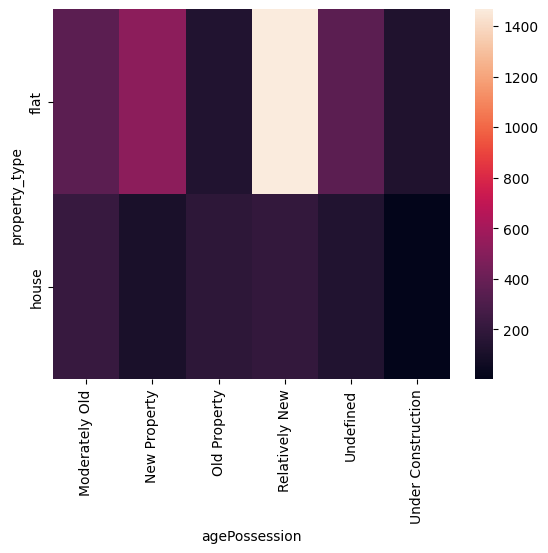

In [35]:
sns.heatmap(pd.crosstab(df['property_type'], df['agePossession']))

**Conclusion**
  + most of the flats are relatively new.
  + most of the houses are moderately old.

In [39]:
pd.pivot_table(df, index='property_type', columns='agePossession', values='price_in_crores', aggfunc='mean')

agePossession  Moderately Old  New Property  Old Property  Relatively New  \
property_type                                                               
flat                 2.088080      1.528150      1.882077         1.68426   
house                5.640905      6.291845      4.798539         6.57575   

agePossession  Undefined  Under Construction  
property_type                                 
flat            1.756418            1.471654  
house           2.495564            3.337500

<Axes: xlabel='agePossession', ylabel='property_type'>

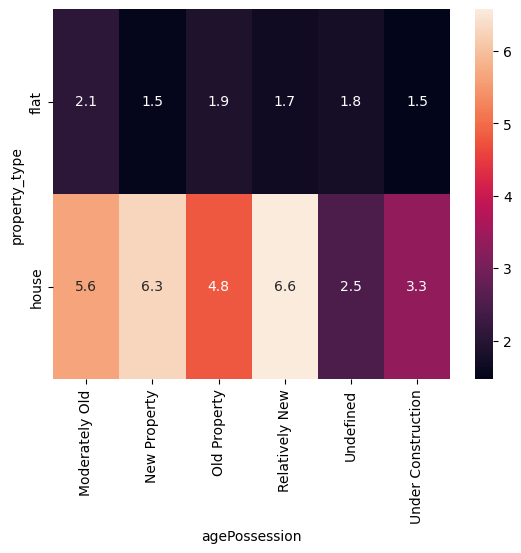

In [41]:
sns.heatmap(pd.pivot_table(df, index='property_type', columns='agePossession', values='price_in_crores', aggfunc='mean'), annot=True)

**Observation**
  + flats has almost similar pattern in the prices.
  +  new houses are expensive while old houses are slightly cheaper.

<Axes: xlabel='furnishing_type', ylabel='property_type'>

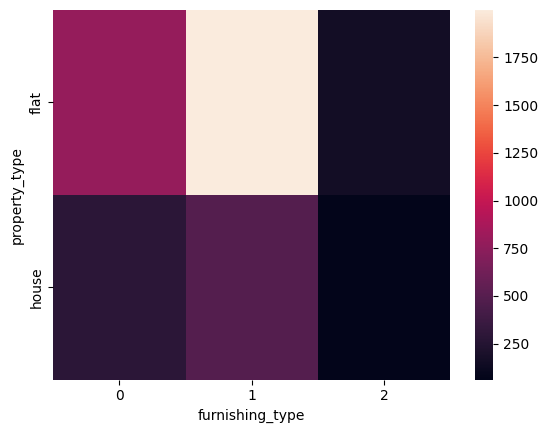

In [45]:
sns.heatmap(pd.crosstab(df['property_type'], df['furnishing_type']))

<Axes: xlabel='bedRoom', ylabel='property_type'>

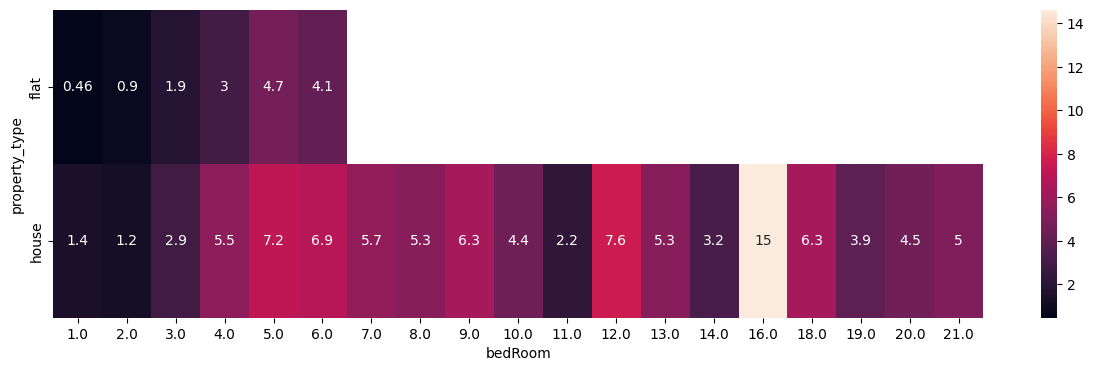

In [47]:
plt.figure(figsize=(15,4))
sns.heatmap(pd.pivot_table(df,index='property_type', columns='bedRoom', values='price_in_crores', aggfunc='mean'), annot=True)

**Observations**
  + flats has atmost 6 bedrooms.
  + houses has much more bedrooms up to 21.
  + flats prices are justified according to bedrooms (in increasing order i.e if bedroom is increasing prices too)
  + there is some issue in the house 16 bedroom prices is of 15 crores while 21 bedroom is of 5 crores.

## Property type vs furnishing type

<Axes: xlabel='furnishing_type', ylabel='property_type'>

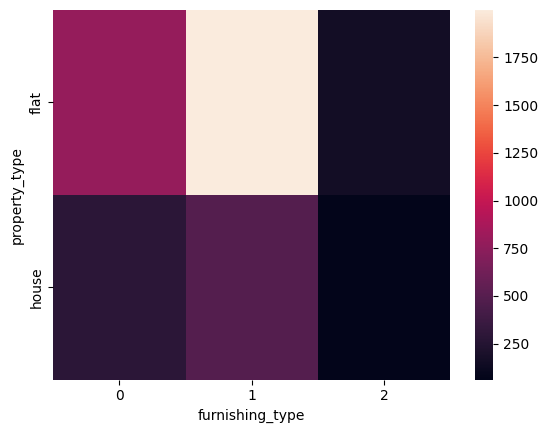

In [49]:
sns.heatmap(pd.crosstab(df['property_type'] , df['furnishing_type']))

<Axes: xlabel='furnishing_type', ylabel='property_type'>

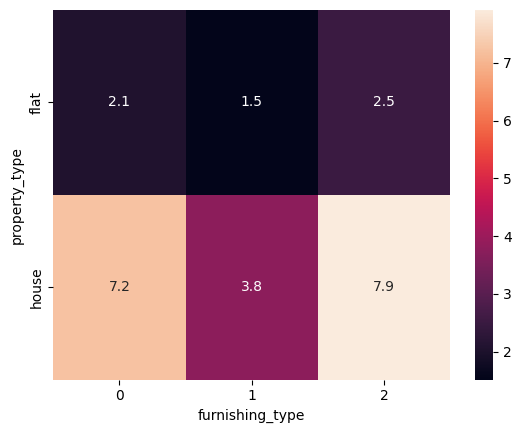

In [51]:
sns.heatmap(pd.pivot_table(df, index='property_type', columns='furnishing_type', values='price_in_crores',aggfunc='mean'), annot=True)

**Observation**
  + Flats are almost furnished (i.e flats has maximum required ammenities like AC, fridge, cooler, washing machine etc.)
  + some houses has the ammenties while many has not.
  + According to furnising_type prices of the house are also justified.

## Property_type vs luxury score

<Axes: xlabel='property_type', ylabel='luxury_score'>

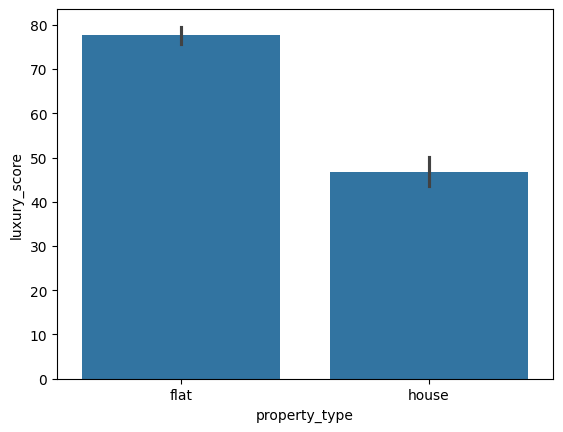

In [53]:
sns.barplot(x=df['property_type'], y=df['luxury_score'])

<Axes: xlabel='property_type', ylabel='luxury_score'>

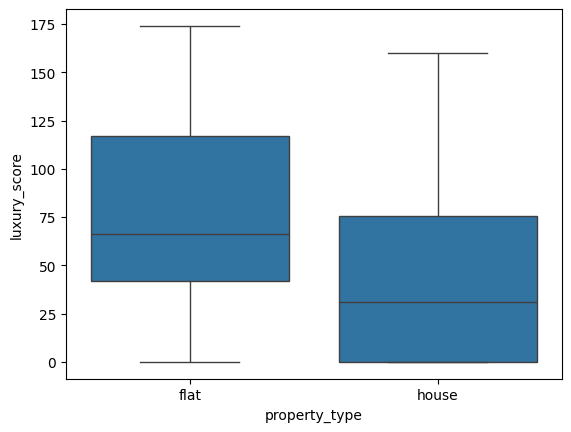

In [54]:
sns.boxplot(x=df['property_type'], y=df['luxury_score'])

<Axes: xlabel='property_type', ylabel='luxury_score'>

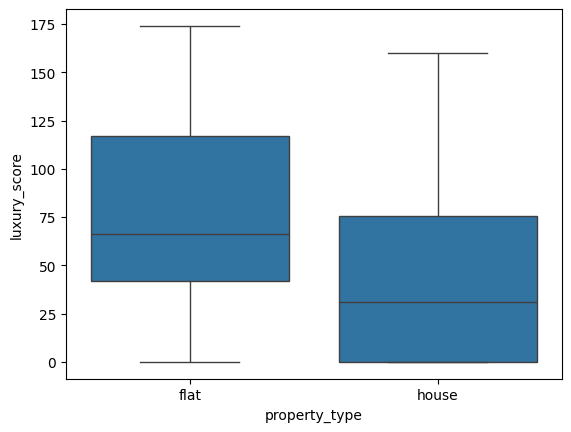

In [55]:
sns.boxplot(x=df['property_type'], y=df['luxury_score'])

<Axes: xlabel='sector', ylabel='property_type'>

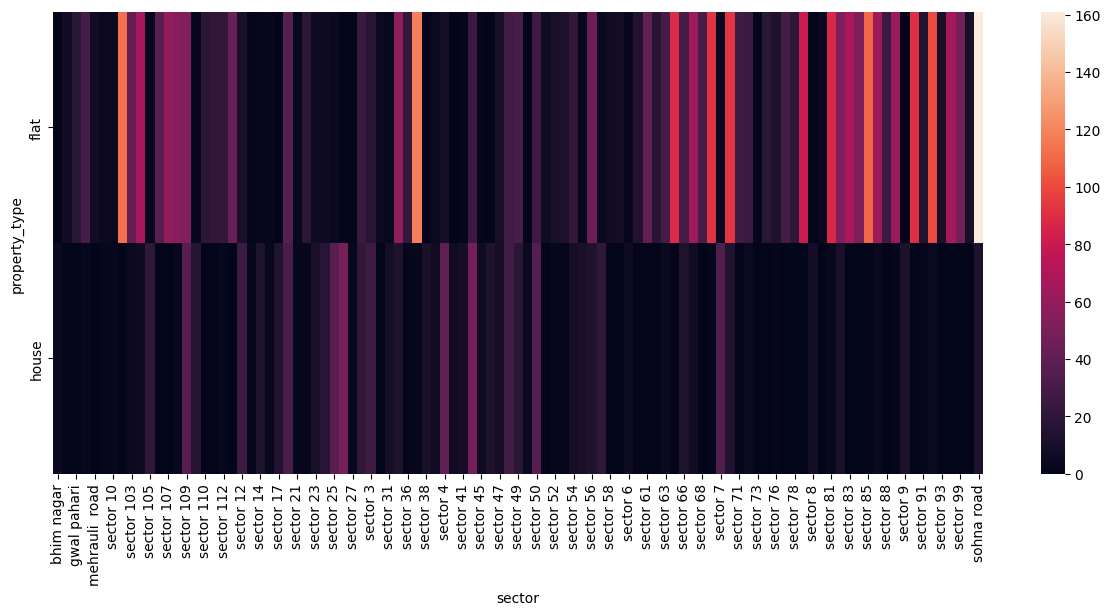

In [56]:
# sector analysis
plt.figure(figsize=(15,6))
sns.heatmap(pd.crosstab(df['property_type'], df['sector'].sort_index()))

**Observation**
  + new sector has more flats while older sectors has more houses.

In [60]:
df.groupby('sector')['price_in_crores'].mean().reset_index()

sector  price_in_crores
0           bhim nagar         0.752500
1    dwarka expressway         1.372500
2          gwal pahari         3.192222
3              manesar         0.961515
4       mehrauli  road         3.508750
5             sector 1         1.860000
6            sector 10         1.943750
7           sector 102         1.681327
8           sector 103         1.441556
9           sector 104         1.550548
10          sector 105         1.131739
11          sector 106         1.548421
12          sector 107         0.771667
13          sector 108         1.996724
14          sector 109         3.939432
15           sector 11         1.718421
16          sector 110         3.064737
17          sector 111         2.900000
18          sector 112         4.560000
19          sector 113         2.465814
20           sector 12         1.561892
21           sector 13         2.206667
22           sector 14         4.861333
23           sector 15         2.716667
24           sector 17         3.955714
25            sector 2         2.278676
26           sector 21         1.025000
27           sector 22         3.429000
28           sector 23         2.903529
29           sector 24         5.123913
30           sector 25         8.860000
31           sector 26        12.564082
32           sector 27         6.833333
33           sector 28         4.376222
34            sector 3         0.824091
35           sector 30         1.568000
36           sector 31         4.382500
37           sector 33         2.670563
38           sector 36         1.091250
39           sector 37         1.127025
40           sector 38         3.716667
41           sector 39         3.486667
42            sector 4         1.135000
43           sector 40         5.781250
44           sector 41         6.140909
45           sector 43         5.413973
46           sector 45         8.498750
47           sector 46         4.235385
48           sector 47         3.307368
49           sector 48         6.048036
50           sector 49         3.302500
51            sector 5         2.128333
52           sector 50         6.740635
53           sector 51         1.558571
54           sector 52         2.714286
55           sector 53         5.782857
56           sector 54         6.222581
57           sector 55         4.050714
58           sector 56         2.585789
59           sector 57         4.767917
60           sector 58         3.297143
61           sector 59         4.875000
62            sector 6         0.662222
63           sector 60         3.987333
64           sector 61         2.095952
65           sector 62         5.450000
66           sector 63         3.523939
67           sector 65         3.327778
68           sector 66         5.934762
69           sector 67         2.593286
70           sector 68         1.247667
71           sector 69         1.559681
72            sector 7         1.703846
73           sector 70         2.010374
74           sector 71         0.948519
75           sector 72         4.163448
76           sector 73         6.300000
77           sector 74         1.772222
78           sector 76         1.516429
79           sector 77         1.311379
80           sector 78         1.130526
81           sector 79         1.377125
82            sector 8         0.713750
83           sector 80         1.270000
84           sector 81         1.930333
85           sector 82         2.171290
86           sector 83         1.254348
87           sector 84         0.975490
88           sector 85         1.499909
89           sector 86         1.179701
90           sector 88         1.337692
91           sector 89         1.117031
92            sector 9         1.383846
93           sector 90         1.189667
94           sector 91         1.648235
95           sector 92         0.931346
96           sector 93         0.808182
97           sector 95         0.469848
98           sector 99         1.109583
99           sec

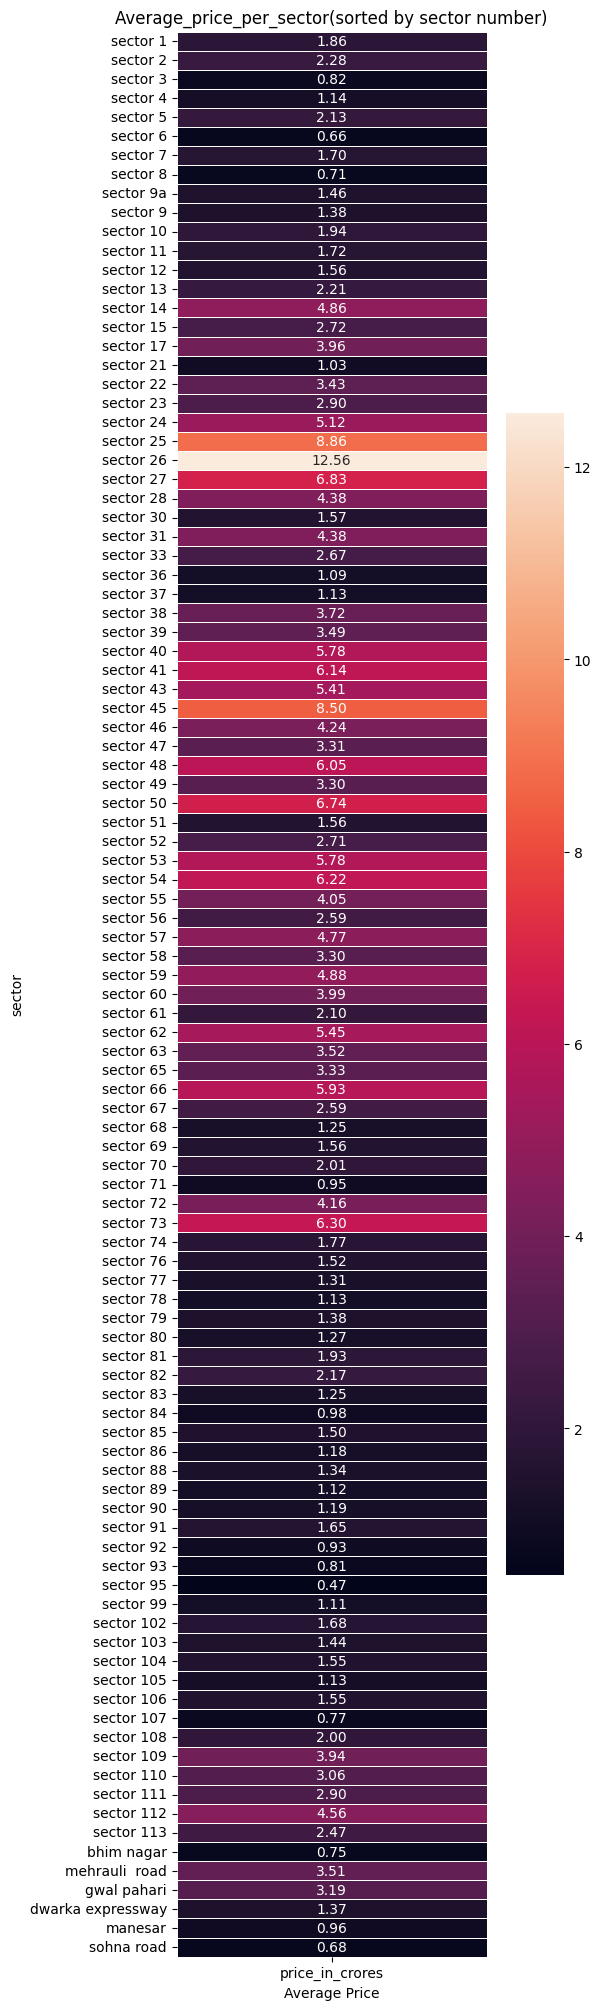

In [59]:
# sector analysis

import re
# Group by 'sector' and calculate the average price 
avg_price_per_sector = df.groupby('sector')['price_in_crores'].mean().reset_index()

# function to extract sector numbers
def extract_sector_number(sector_name):
    match = re.search(r'\d+', sector_name)
    if match:
        return int(match.group())
    else:
        return float('inf') # Return a large number for non_numbered sectors

avg_price_per_sector['sector_number'] = avg_price_per_sector['sector'].apply(extract_sector_number)

# sort by sector number
avg_price_per_sector_sorted_by_sector = avg_price_per_sector.sort_values(by='sector_number')

# plot the heatmap
plt.figure(figsize=(5,25))
sns.heatmap(avg_price_per_sector_sorted_by_sector.set_index('sector')[['price_in_crores']], annot=True, fmt=".2f", linewidths=0.5)
plt.title('Average_price_per_sector(sorted by sector number)')
plt.xlabel('Average Price')
plt.ylabel('sector')
plt.show()

In [63]:
df.head(1)

property_type                 society    sector  price_in_crores  \
0          flat  maa bhagwati residency  sector 7             0.45   

   price_per_sqft  area_sqft                    areaWithType  bedRoom  \
0          5000.0      900.0  Carpet area: 900 (83.61 sq.m.)      2.0   

   bathroom balcony  floorNum facing   agePossession  Super Built up area  \
0       2.0       1       4.0   West  Relatively New                  NaN   

   Built Up area  Carpet area  study room  store room  Pooja Room  \
0            NaN        900.0           0           0           0   

   servant room  Others  furnishing_type  luxury_score  
0             0       0                1            28

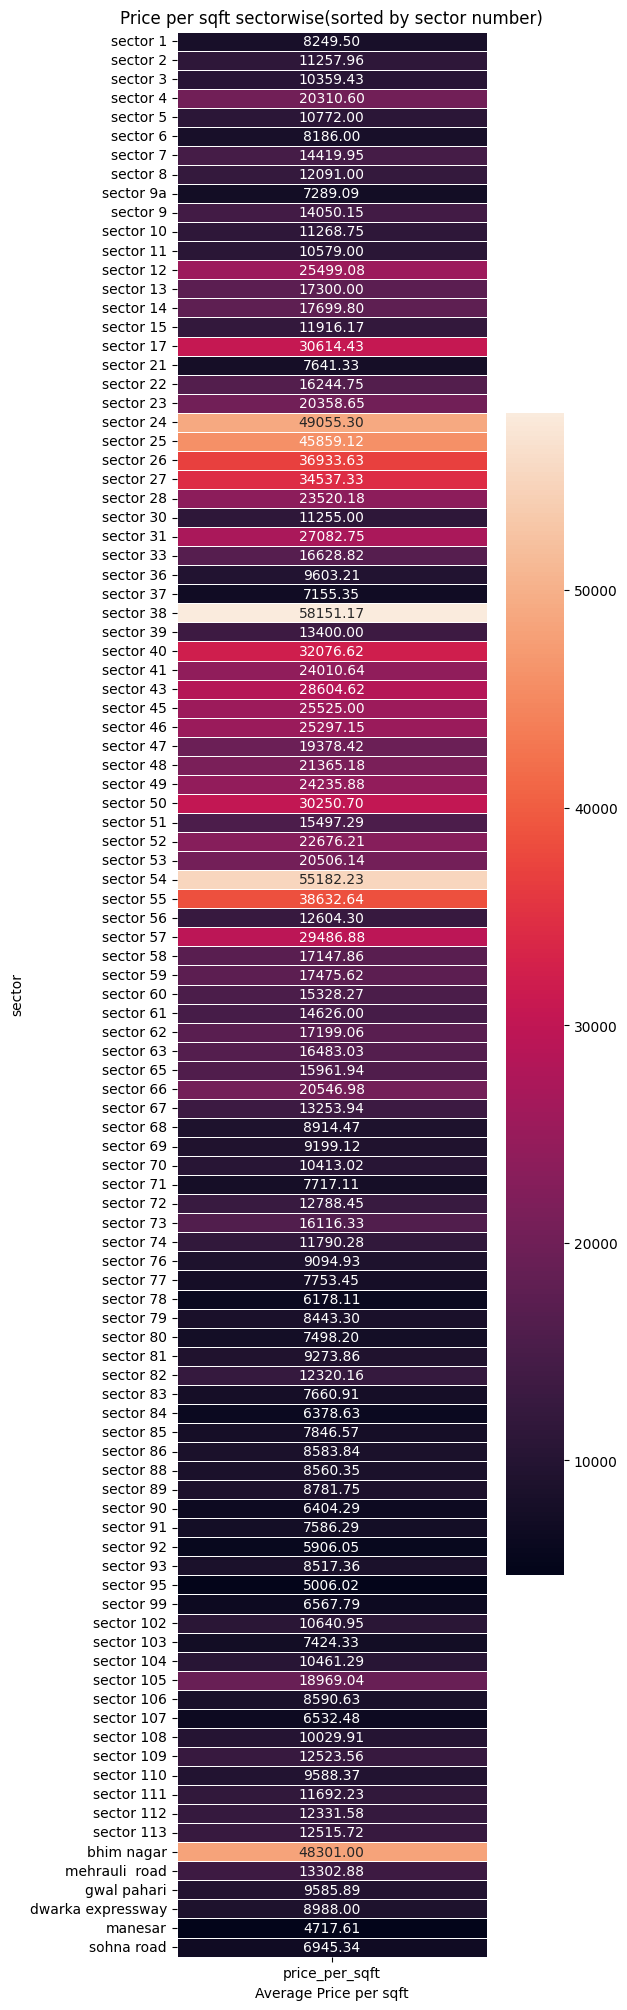

In [64]:

# Group by 'sector' and calculate the price per sqft 
avg_price_per_sqft_sector = df.groupby('sector')['price_per_sqft'].mean().reset_index()

avg_price_per_sqft_sector['sector_number'] = avg_price_per_sqft_sector['sector'].apply(extract_sector_number)

# sort by sector number
avg_price_per_sqft_sector_sorted_by_sector = avg_price_per_sqft_sector.sort_values(by='sector_number')

# plot the heatmap
plt.figure(figsize=(5,25))
sns.heatmap(avg_price_per_sqft_sector_sorted_by_sector.set_index('sector')[['price_per_sqft']], annot=True, fmt=".2f", linewidths=0.5)
plt.title('Price per sqft sectorwise(sorted by sector number)')
plt.xlabel('Average Price per sqft')
plt.ylabel('sector')
plt.show()

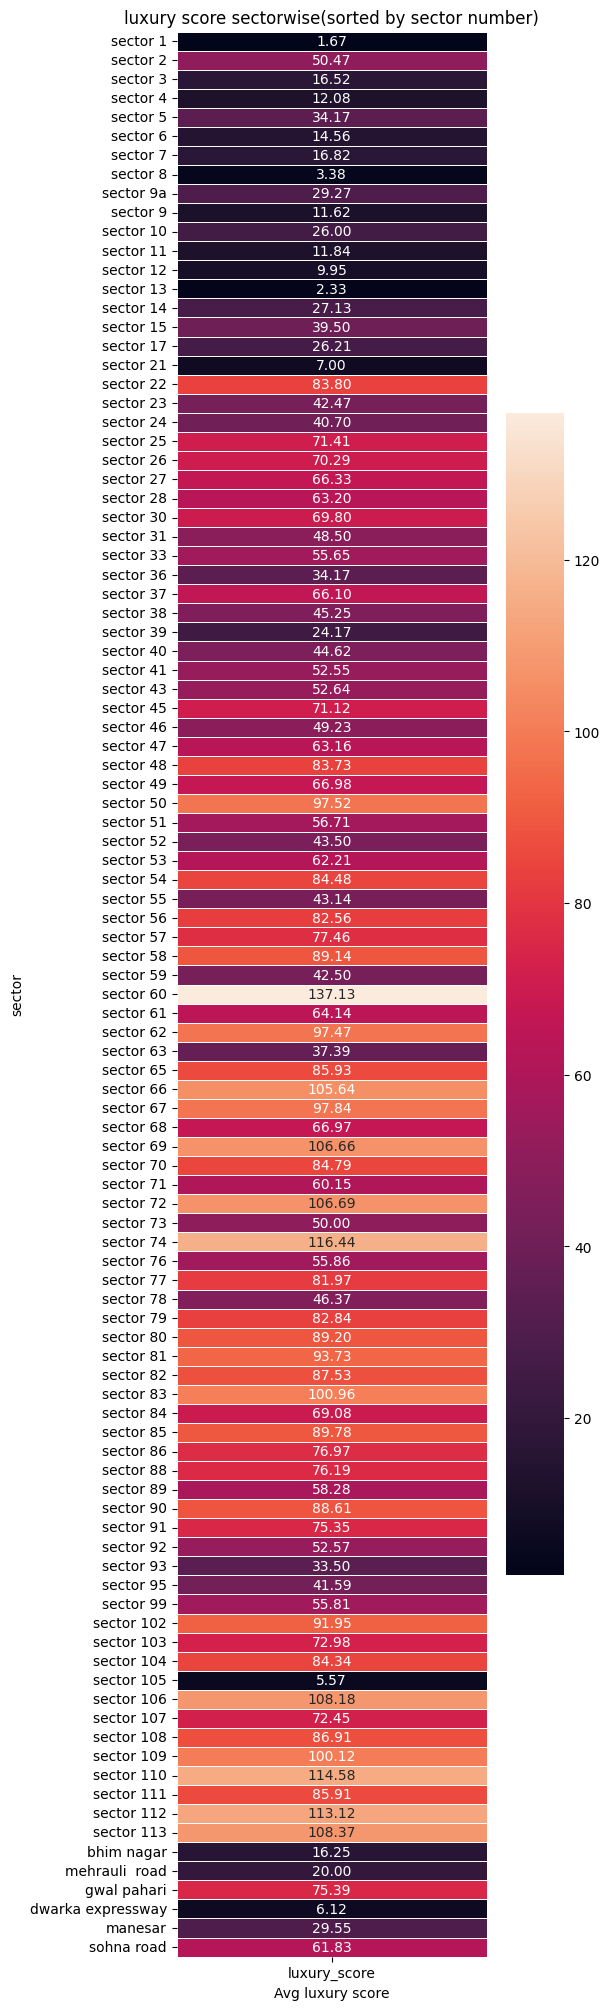

In [65]:
luxury_score = df.groupby('sector')['luxury_score'].mean().reset_index()

luxury_score['sector_number'] = luxury_score['sector'].apply(extract_sector_number)

luxury_score_sorted_by_sector = luxury_score.sort_values(by='sector_number')

plt.figure(figsize=(5,25))
sns.heatmap(luxury_score_sorted_by_sector.set_index('sector')[['luxury_score']], annot=True, fmt=".2f", linewidths=0.5)
plt.title('luxury score sectorwise(sorted by sector number)')
plt.xlabel('Avg luxury score')
plt.ylabel('sector')
plt.show()

In [66]:
## Price in crores

In [68]:
df.head(1)

property_type                 society    sector  price_in_crores  \
0          flat  maa bhagwati residency  sector 7             0.45   

   price_per_sqft  area_sqft                    areaWithType  bedRoom  \
0          5000.0      900.0  Carpet area: 900 (83.61 sq.m.)      2.0   

   bathroom balcony  floorNum facing   agePossession  Super Built up area  \
0       2.0       1       4.0   West  Relatively New                  NaN   

   Built Up area  Carpet area  study room  store room  Pooja Room  \
0            NaN        900.0           0           0           0   

   servant room  Others  furnishing_type  luxury_score  
0             0       0                1            28

<Axes: xlabel='area_sqft', ylabel='price_in_crores'>

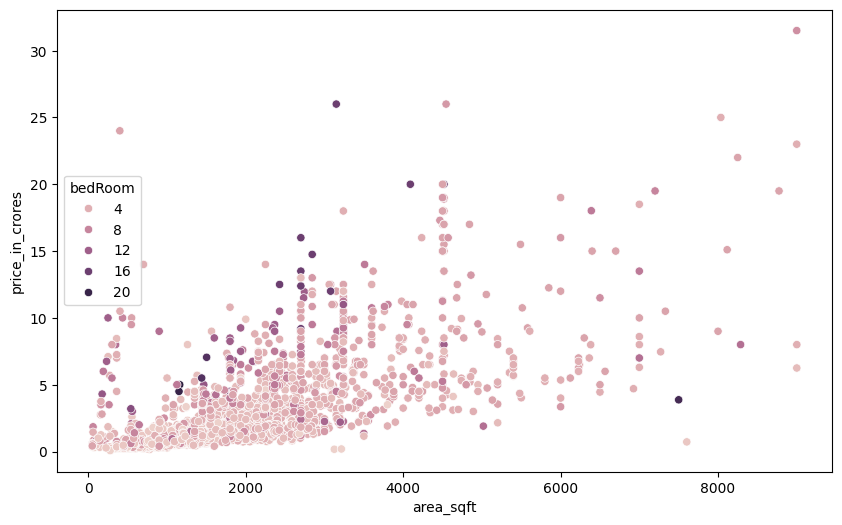

In [73]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df[df['area_sqft'] < 10000],
    x='area_sqft',
    y='price_in_crores',
    hue='bedRoom')

<Axes: xlabel='area_sqft', ylabel='price_in_crores'>

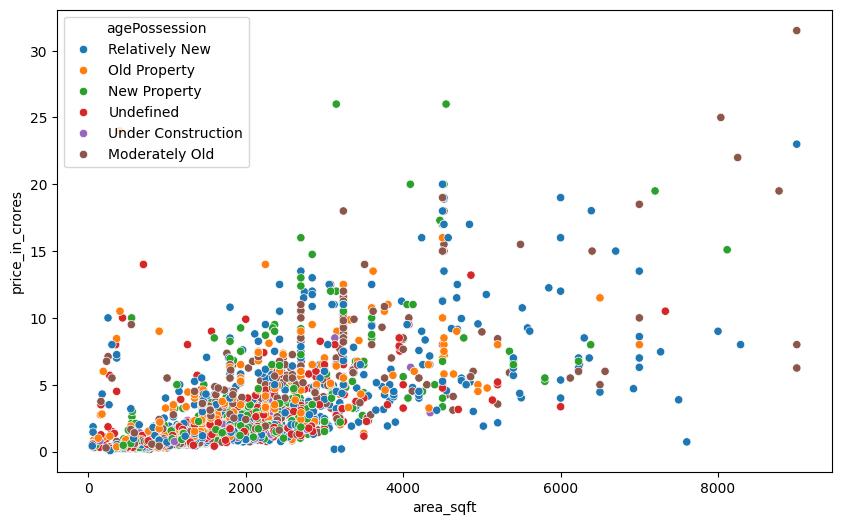

In [74]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df[df['area_sqft'] < 10000],
    x='area_sqft',
    y='price_in_crores',
    hue='agePossession')

<Axes: xlabel='area_sqft', ylabel='price_in_crores'>

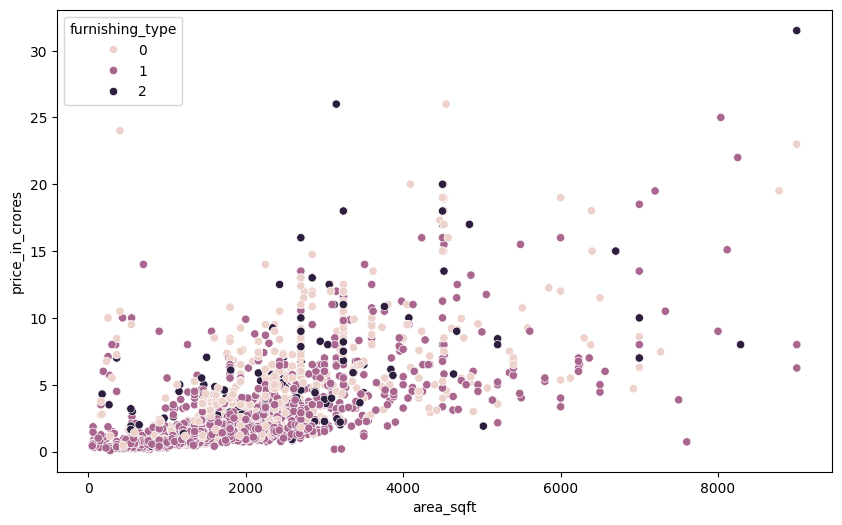

In [75]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df[df['area_sqft'] < 10000],
    x='area_sqft',
    y='price_in_crores',
    hue='furnishing_type')

<Axes: xlabel='bedRoom', ylabel='price_in_crores'>

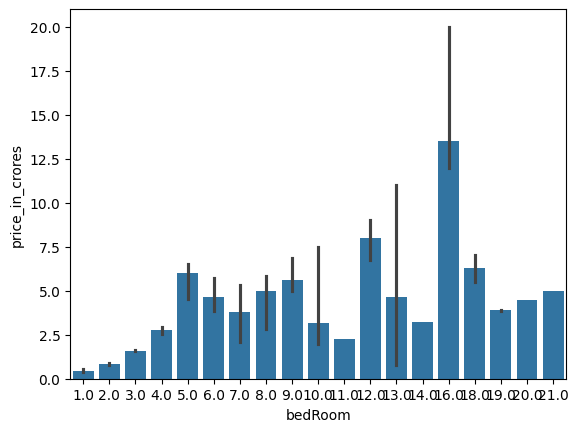

In [76]:
sns.barplot(x=df['bedRoom'],y=df["price_in_crores"], estimator=np.median)

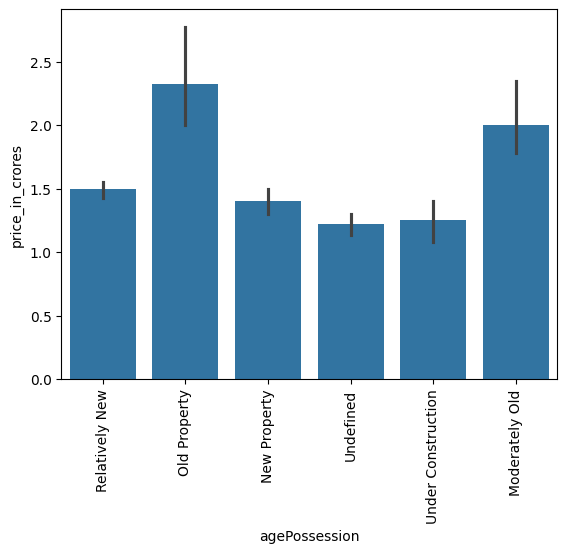

In [77]:
sns.barplot(x=df['agePossession'], y=df['price_in_crores'], estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [78]:
df[['property_type','agePossession','price_in_crores']]

property_type       agePossession  price_in_crores
0             flat      Relatively New             0.45
1             flat        Old Property             0.50
2             flat        New Property             0.40
3             flat           Undefined             1.47
4             flat  Under Construction             0.70
5             flat           Undefined             0.41
6             flat        New Property             2.00
7             flat        New Property             1.80
8             flat  Under Construction             1.10
9             flat           Undefined             4.75
10            flat           Undefined             0.96
11            flat      Relatively New             0.29
12            flat      Relatively New             1.35
13            flat  Under Construction             0.95
14            flat        New Property             0.70
15            flat           Undefined             3.95
16            flat           Undefined             0.90
17            flat           Undefined             1.05
18            flat  Under Construction              NaN
19            flat        New Property             2.20
20            flat           Undefined             1.01
21            flat        New Property             1.85
22            flat  Under Construction             0.86
23            flat      Relatively New             1.85
24            flat        New Property             2.85
25            flat           Undefined             0.42
26            flat           Undefined             6.15
27            flat      Moderately Old             6.25
28            flat      Relatively New             0.42
29            flat           Undefined             1.35
30            flat      Relatively New             1.60
31            flat      Moderately Old             3.25
32            flat        New Property             0.45
33            flat           Undefined             0.85
34            flat           Undefined             0.75
35            flat  Under Construction             0.82
36            flat      Moderately Old             1.80
37            flat        New Property             0.30
38            flat      Moderately Old             0.78
39            flat        Old Property             2.00
40            flat        New Property             0.74
41            flat           Undefined             3.20
42            flat      Relatively New             1.30
43            flat      Relatively New             0.25
44            flat      Relatively New             0.95
45            flat      Relatively New             1.99
46            flat        New Property             1.05
47            flat           Undefined             1.83
48            flat      Relatively New             2.25
49            flat      Relatively New             2.80
50            flat      Relatively New             1.60
51            flat        New Property             0.83
52            flat        New Property             0.83
53            flat        New Property             0.80
54            flat      Moderately Old             1.25
55            flat        New Property             0.30
56            flat      Relatively New             1.55
57            flat      Relatively New             0.79
58            flat           Undefined             1.01
59            flat      Moderately Old             0.95
60            flat      Relatively New             0.99
61            flat           Undefined             1.10
62            flat        New Property             1.90
63            flat  Under Construction             1.00
64            flat      Moderately Old             2.50
65            flat  Under Construction             1.10
66            flat      Relatively New             0.29
67            flat           Undefined             0.55
68            flat      Relatively New             0.65
69            flat        New Property             0.50
70            flat        New

In [80]:
df.groupby('agePossession')['price_in_crores'].mean().reset_index()

agePossession  price_in_crores
0      Moderately Old         3.465579
1        New Property         2.316994
2        Old Property         3.567565
3      Relatively New         2.271122
4           Undefined         1.960373
5  Under Construction         1.528626

In [84]:
df.groupby(['property_type', 'agePossession','area_sqft'])[['area_sqft','price_in_crores']].mean()

area_sqft  price_in_crores
property_type agePossession      area_sqft                                    
flat          Moderately Old     72.000000          72.000000         0.300000
                                 250.000000        250.000000         0.290000
                                 462.000000        462.000000         0.450000
                                 465.000000        465.000000         0.400000
                                 500.000000        500.000000         0.200000
                                 576.000000        576.000000         0.260000
                                 600.000000        600.000000         0.600000
                                 624.000000        624.000000         0.380000
                                 649.000000        649.000000         0.560000
                                 650.000000        650.000000         0.550000
                                 655.000000        655.000000         0.560000
                                 700.000000        700.000000         0.590000
                                 735.000000        735.000000         0.600000
                                 750.000000        750.000000         0.420000
                                 755.000000        755.000000         0.650000
                                 780.000000        780.000000         0.160000
                                 850.000000        850.000000         0.380000
                                 867.000000        867.000000         0.350000
                                 900.000000        900.000000         0.480000
                                 950.000000        950.000000         0.850000
                                 970.000000        970.000000         1.000000
                                 988.000000        988.000000         1.050000
                                 1000.000000      1000.000000         0.870000
                                 1059.000000      1059.000000         0.860000
                                 1100.000000      1100.000000         0.683333
                                 1110.000000      1110.000000         1.100000
                                 1126.000000      1126.000000         1.350000
                                 1140.000000      1140.000000         0.750000
                                 1150.000000      1150.000000         0.670000
                                 1158.000000      1158.000000         0.820000
                                 1161.000000      1161.000000         1.670000
                                 1184.000000      1184.000000         0.560000
                                 1198.000000      1198.000000         0.950000
                                 1200.000000      1200.000000         0.925000
                                 1225.000000      1225.000000         1.050000
                                 1235.000000      1235.000000         0.650000
                                 1239.000000      1239.000000         0.620000
                                 1245.000000      1245.000000         0.855000
                                 1250.000000      1250.000000         0.480000
                                 1257.000000      1257.000000         0.750000
                                 1280.000000      1280.000000         0.690000
                                 1320.000000      1320.000000         0.800000
                                 1326.000000      1326.000000         0.910000
                                 1336.000000      1336.000000         1.140000
                                 1350.000000      1350.000000         0.716667
                                 1365.000000      1365.000000         0.780000
                                 1366.000000      1366.000000         0.940000
                                 1368.000000      1368.000000         1.600000
                                 1395.000000      1395.000000         2.040000
                       

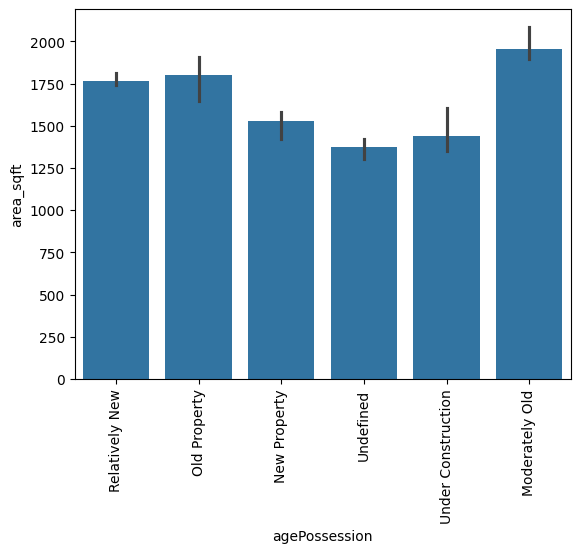

In [85]:
sns.barplot(x=df['agePossession'],y=df['area_sqft'], estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='furnishing_type', ylabel='price_in_crores'>

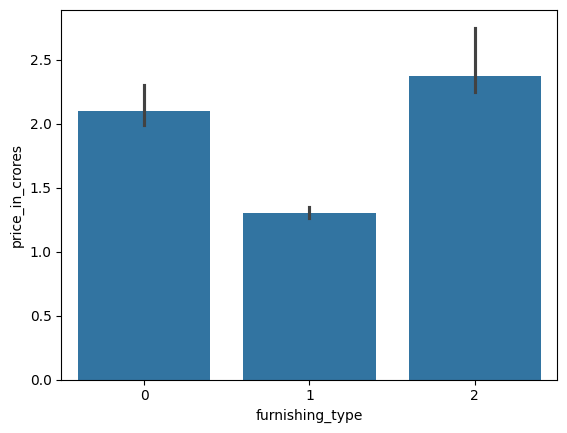

In [87]:
sns.barplot(x=df['furnishing_type'], y=df['price_in_crores'], estimator=np.median)

<Axes: xlabel='luxury_score', ylabel='price_in_crores'>

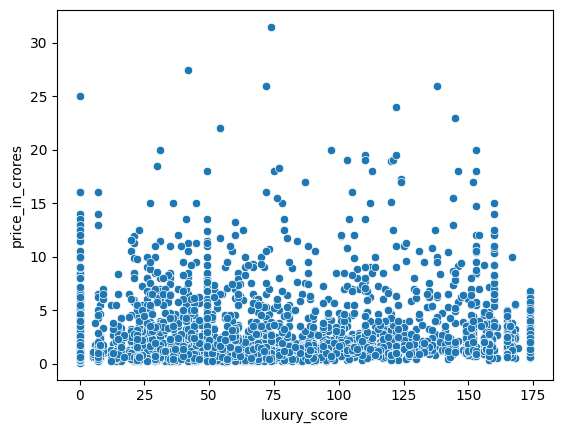

In [90]:
sns.scatterplot(x=df['luxury_score'],y=df['price_in_crores'])

## Correlation 

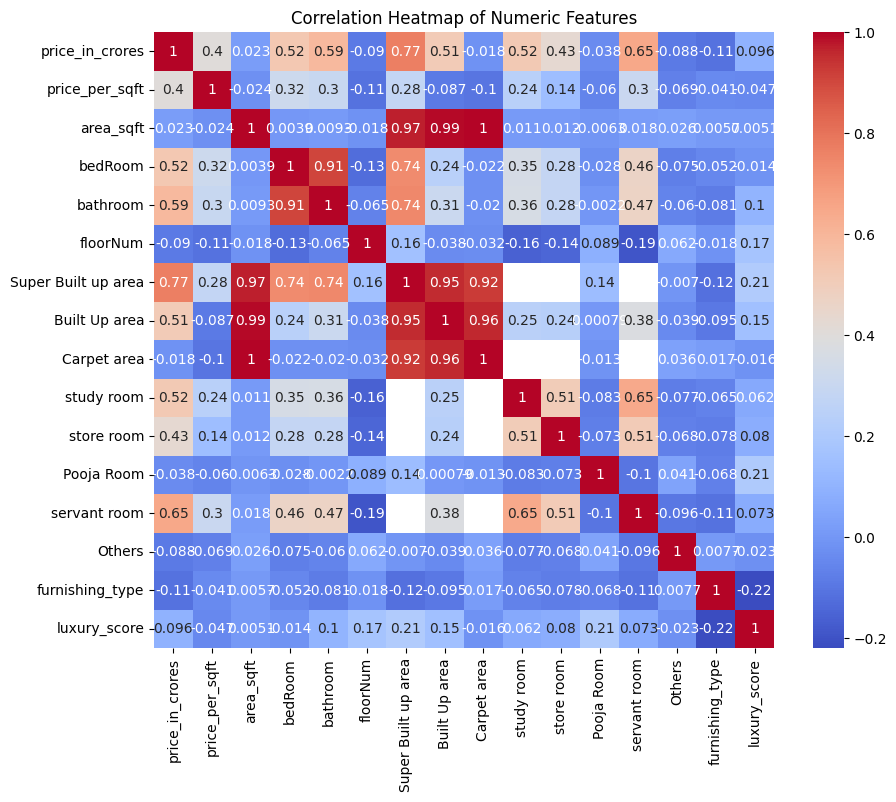

In [93]:
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


In [95]:
df.select_dtypes(include='number').corr()['price_in_crores'].sort_values(ascending=False)


price_in_crores        1.000000
Super Built up area    0.770986
servant room           0.650072
bathroom               0.589591
bedRoom                0.524255
study room             0.520508
Built Up area          0.509471
store room             0.432820
price_per_sqft         0.400512
luxury_score           0.095586
area_sqft              0.023088
Carpet area           -0.017517
Pooja Room            -0.037786
Others                -0.087766
floorNum              -0.090142
furnishing_type       -0.113320
Name: price_in_crores, dtype: float64

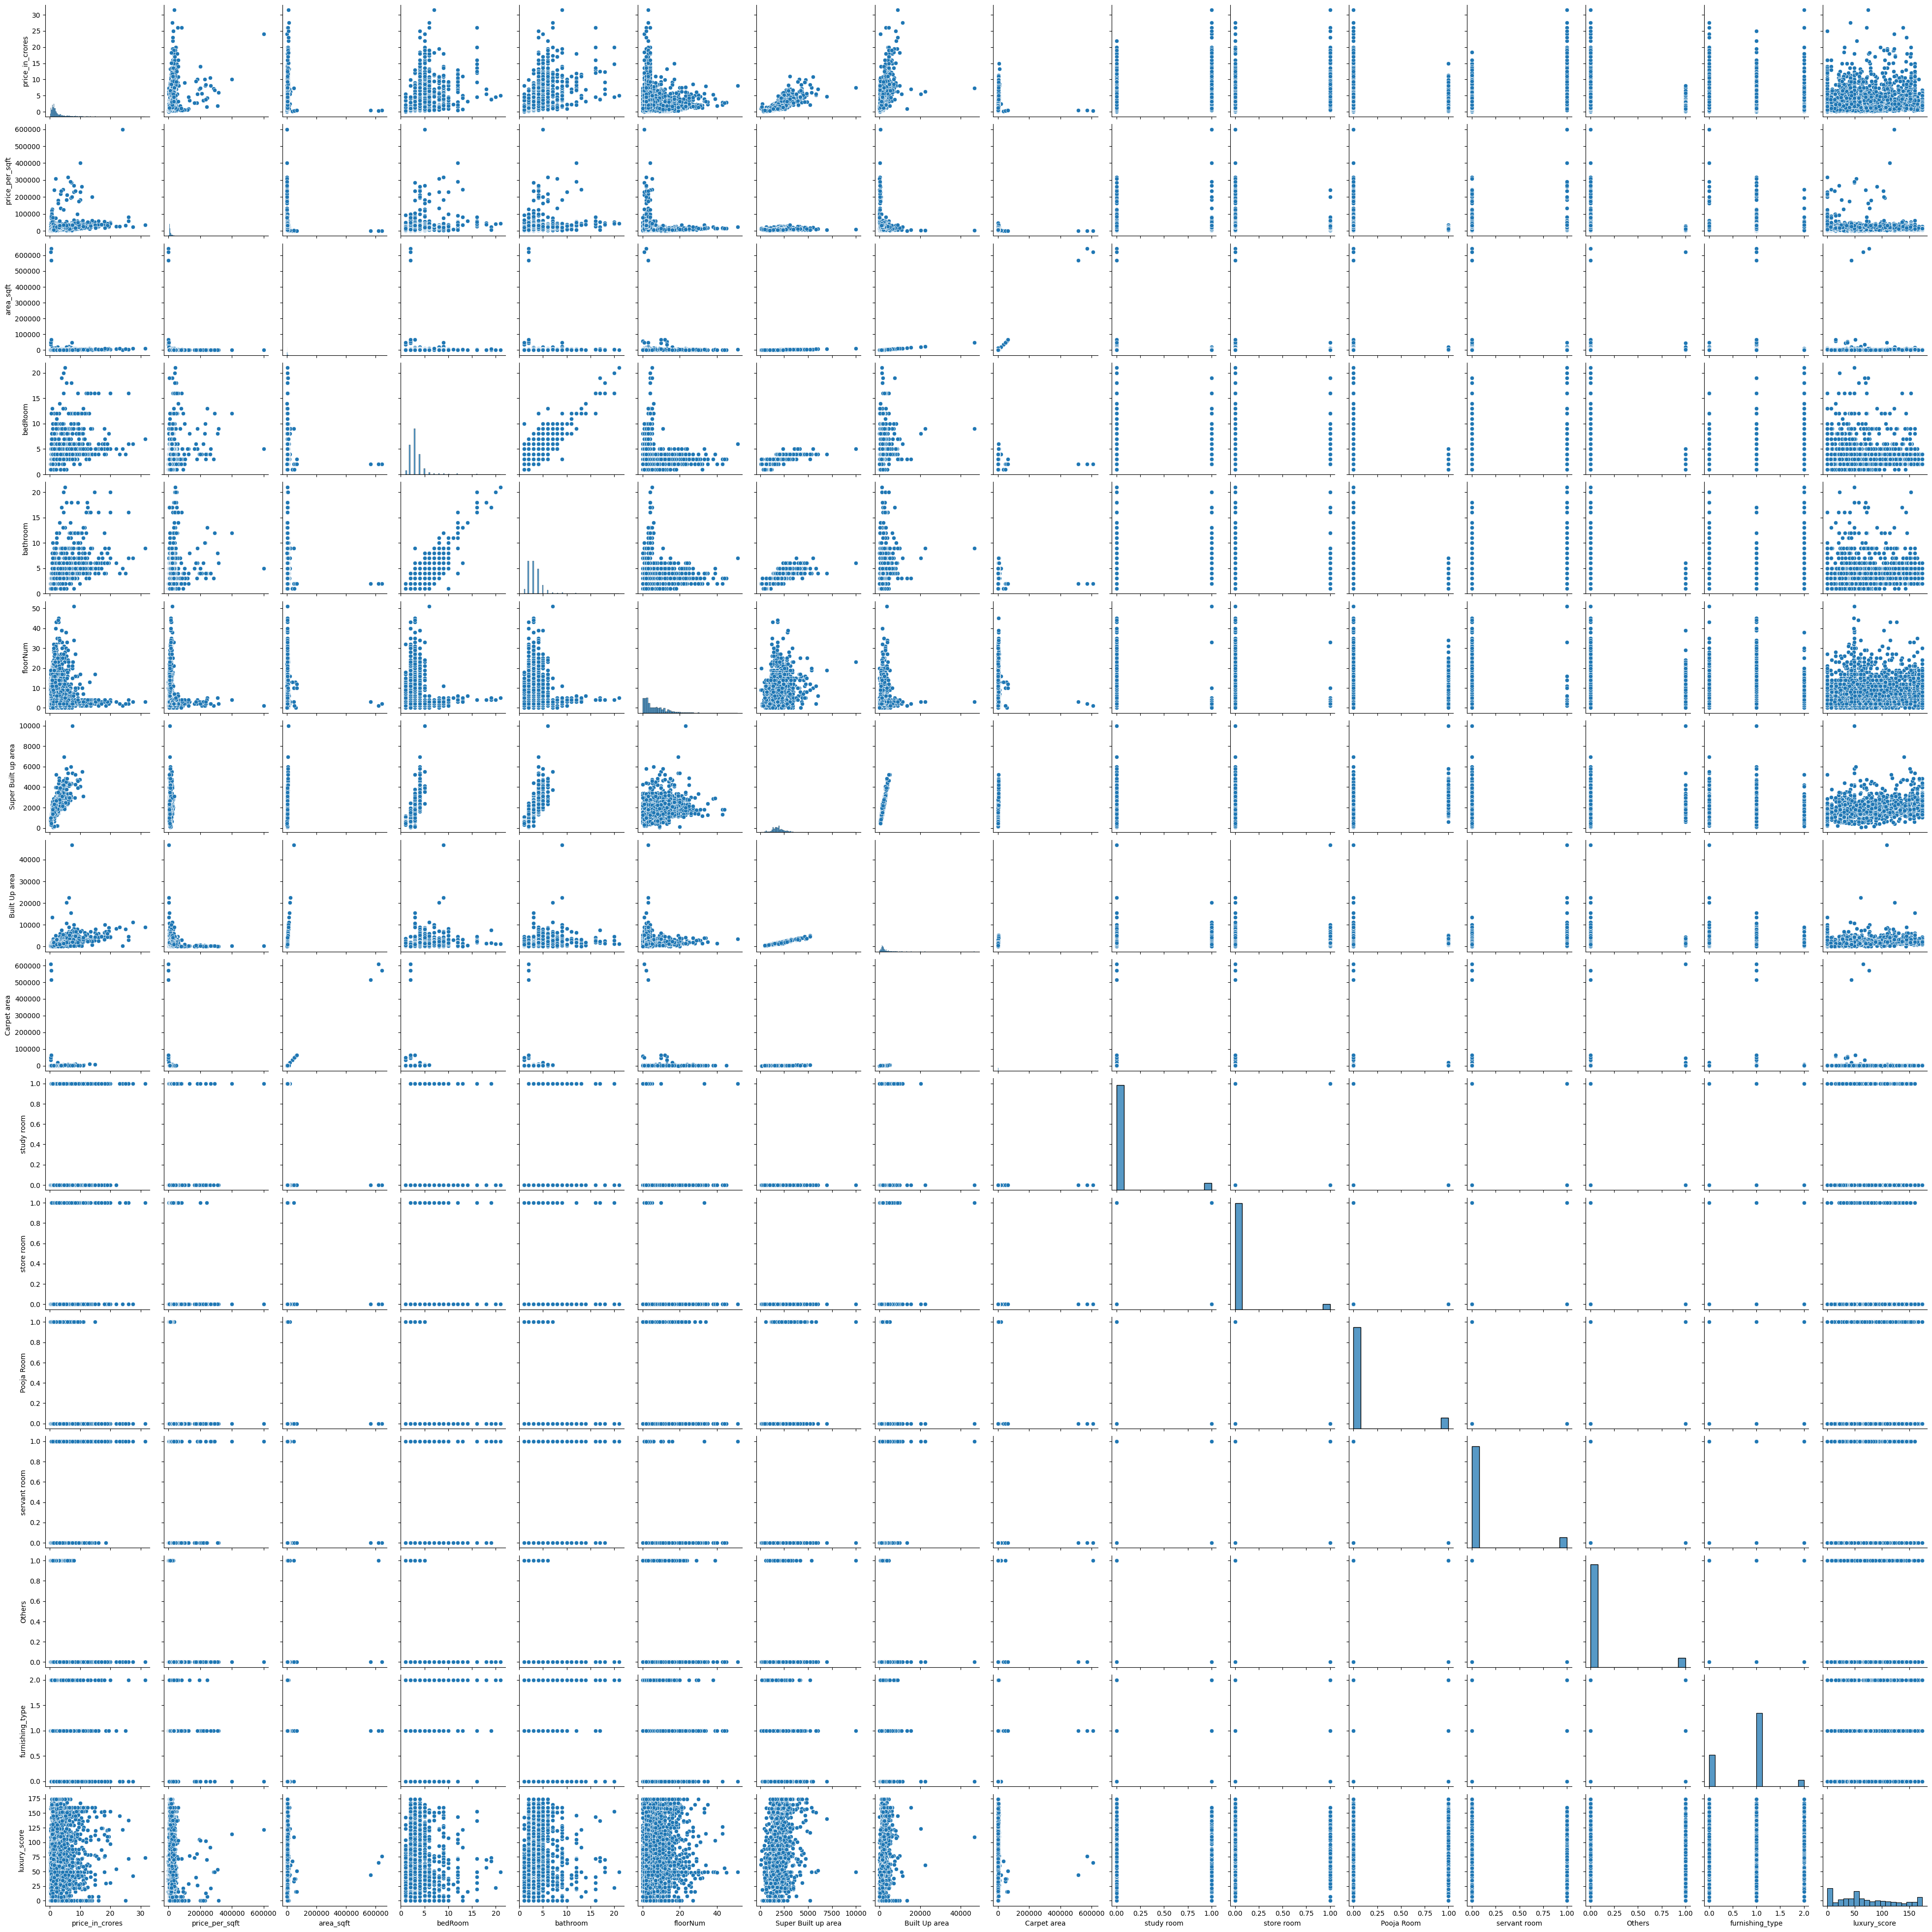

In [97]:
sns.pairplot(df)